In [31]:
# Imports
import os
import pandas as pd
import numpy as np
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
#Here we load the MFRC data which is available from HuggingFace
ds_reddit = load_dataset("USC-MOLA-Lab/MFRC")

Repo card metadata block was not found. Setting CardData to empty.


In [33]:
ds_reddit

DatasetDict({
    train: Dataset({
        features: ['text', 'subreddit', 'bucket', 'annotator', 'annotation', 'confidence'],
        num_rows: 61226
    })
})

In [35]:
df_reddit = ds_reddit['train'].to_pandas()
df_reddit.tail(30)

,text,subreddit,bucket,annotator,annotation,confidence
61196,What kind of confessions would you confine it ...,confession,Everyday Morality,annotator05,Thin Morality,Somewhat Confident
61197,Is there a proportionate level of sexual haras...,AmItheAsshole,Everyday Morality,annotator05,Purity,Confident
61198,Yeah I feel like alot of people have done stuf...,confession,Everyday Morality,annotator05,Loyalty,Not Confident
61199,Woah dude. You called your kid a burden. Damn....,AmItheAsshole,Everyday Morality,annotator05,Thin Morality,Confident
61200,Yeah I guess I’m learning that art is a lot br...,confession,Everyday Morality,annotator05,Non-Moral,Somewhat Confident
61201,Won't let you sleep in a different room? Don't...,relationship_advice,Everyday Morality,annotator05,"Purity,Loyalty",Somewhat Confident
61202,You’re very lucky no one snitched on you. I ha...,confession,Everyday Morality,annotator05,Loyalty,Confident
61203,even though he is okay i feel like a shitty ol...,confession,Everyday Morality,annotator05,Care,Confident
61204,It did there is proof that it did if you go ba...,nostalgia,Everyday Morality,annotator05,Authority,Confident
61205,thats so sad. power rangers are morally harmle...,nostalgia,Everyday Morality,annotator05,Thin Morality,Somewhat Confident


In [5]:
# Replace 'Equality' and 'Proportionality' with 'Fairness'
df_reddit['annotation'] = df_reddit['annotation'].replace(['Equality', 'Proportionality'], 'Fairness')

# Verify the changes
print(df_reddit['annotation'].value_counts())

Non-Moral                                          30770
Thin Morality                                      11113
Fairness                                            4542
Care                                                3882
Authority                                           3111
                                                   ...  
Equality,Proportionality,Care,Loyalty,Authority        1
Proportionality,Care,Authority                         1
Purity,Proportionality,Authority                       1
Proportionality,Authority,Loyalty,Equality             1
Authority,Loyalty                                      1
Name: annotation, Length: 127, dtype: int64


In [7]:
# Filter the dataframe to show only rows where annotation is 'Fairness'
df_reddit[df_reddit['annotation'] == 'Fairness']

,text,subreddit,bucket,annotator,annotation,confidence
8,TBH Marion Le Pen would be better. Closet fasc...,neoliberal,French politics,annotator02,Fairness,Somewhat Confident
23,"Hey, fuck you. Us leftists will never support ...",worldnews,French politics,annotator02,Fairness,Confident
24,Clearly there were enough to affect the result...,worldnews,French politics,annotator03,Fairness,Somewhat Confident
70,"I will be honest, I don't know much about the ...",worldnews,French politics,annotator04,Fairness,Somewhat Confident
74,Nationalist parties all over Europe have alway...,worldnews,French politics,annotator02,Fairness,Confident
...,...,...,...,...,...,...
61180,This is false. Bro clearly does not accept tha...,AmItheAsshole,Everyday Morality,annotator05,Fairness,Confident
61194,"Amen, dude. I don't get where the notion that ...",relationship_advice,Everyday Morality,annotator05,Fairness,Confident
61212,Came here to say this. OP is sexist as hell be...,AmItheAsshole,Everyday Morality,annotator05,Fairness,Confident
61218,Youre allowed to seek attention. Maybe someth...,confession,Everyday Morality,annotator05,Fairness,Somewhat Confident


In [15]:
df_reddit[df_reddit['annotation'] == 'Non-Moral']

,text,subreddit,bucket,annotator,annotation,confidence
0,That particular part of the debate is especial...,europe,French politics,annotator03,Non-Moral,Confident
3,"/r/france is pretty lively, with it's own ling...",europe,French politics,annotator03,Non-Moral,Confident
4,"/r/france is pretty lively, with it's own ling...",europe,French politics,annotator00,Non-Moral,Somewhat Confident
5,"/r/france is pretty lively, with it's own ling...",europe,French politics,annotator02,Non-Moral,Confident
6,TBH Marion Le Pen would be better. Closet fasc...,neoliberal,French politics,annotator03,Non-Moral,Somewhat Confident
...,...,...,...,...,...,...
61192,They came in Happy Meals? Seems more like coll...,nostalgia,Everyday Morality,annotator05,Non-Moral,Somewhat Confident
61200,Yeah I guess I’m learning that art is a lot br...,confession,Everyday Morality,annotator05,Non-Moral,Somewhat Confident
61207,Too true. For the few people to be on the top ...,AmItheAsshole,Everyday Morality,annotator05,Non-Moral,Somewhat Confident
61213,Of course. Not wanting it doesn’t make it any ...,AmItheAsshole,Everyday Morality,annotator05,Non-Moral,Confident


In [17]:
df_reddit[df_reddit['annotation'] == 'Care']

,text,subreddit,bucket,annotator,annotation,confidence
2,That particular part of the debate is especial...,europe,French politics,annotator02,Thin Morality,Confident
7,TBH Marion Le Pen would be better. Closet fasc...,neoliberal,French politics,annotator00,Thin Morality,Not Confident
10,it really is a very unusual situation isn't it...,europe,French politics,annotator04,Thin Morality,Confident
13,The Le Pen brand of conservatism and classical...,europe,French politics,annotator04,Thin Morality,Confident
16,"Macrons face just screams\n""I do not know her,...",europe,French politics,annotator04,Thin Morality,Somewhat Confident
...,...,...,...,...,...,...
61208,"This is the best response, grounded in sense a...",AmItheAsshole,Everyday Morality,annotator05,Thin Morality,Confident
61215,You know what a real apology would look like? ...,AmItheAsshole,Everyday Morality,annotator05,Thin Morality,Confident
61219,This is me. A few months ago I realised that m...,confession,Everyday Morality,annotator05,Thin Morality,Somewhat Confident
61222,Kick! Punch! It's all in the mind. If you wann...,nostalgia,Everyday Morality,annotator05,Thin Morality,Somewhat Confident


In [18]:
df_reddit[df_reddit['annotation'] == 'Loyalty']

,text,subreddit,bucket,annotator,annotation,confidence
42,&gt; Valls is such a disgusting traitor to his...,europe,French politics,annotator03,Loyalty,Confident
44,&gt; Valls is such a disgusting traitor to his...,europe,French politics,annotator00,Loyalty,Not Confident
46,Melenchon's party said they'll hold an interna...,europe,French politics,annotator01,Loyalty,Confident
47,Melenchon's party said they'll hold an interna...,europe,French politics,annotator00,Loyalty,Not Confident
95,Macron is one of the best leaders the EU has r...,neoliberal,French politics,annotator02,Loyalty,Confident
...,...,...,...,...,...,...
61198,Yeah I feel like alot of people have done stuf...,confession,Everyday Morality,annotator05,Loyalty,Not Confident
61202,You’re very lucky no one snitched on you. I ha...,confession,Everyday Morality,annotator05,Loyalty,Confident
61211,YTA - you are 100% being controlling and abusi...,AmItheAsshole,Everyday Morality,annotator05,Loyalty,Confident
61216,Bro I feel like there’s a different problem no...,confession,Everyday Morality,annotator05,Loyalty,Somewhat Confident


In [19]:
df_reddit[df_reddit['annotation'] == 'Authority']

,text,subreddit,bucket,annotator,annotation,confidence
12,The Le Pen brand of conservatism and classical...,europe,French politics,annotator03,Authority,Somewhat Confident
32,Wow did not know all that! Maybe got some sour...,europe,French politics,annotator02,Authority,Confident
50,I believe that Le Pen's desire to reduce Musli...,worldnews,French politics,annotator02,Authority,Not Confident
54,Everything you're listing as problems with neo...,neoliberal,French politics,annotator03,Authority,Somewhat Confident
56,Everything you're listing as problems with neo...,neoliberal,French politics,annotator00,Authority,Not Confident
...,...,...,...,...,...,...
61169,While it is frustrating and seems like it won'...,relationship_advice,Everyday Morality,annotator05,Authority,Somewhat Confident
61189,ESH. Look I get that you are angry but hindsig...,AmItheAsshole,Everyday Morality,annotator05,Authority,Confident
61204,It did there is proof that it did if you go ba...,nostalgia,Everyday Morality,annotator05,Authority,Confident
61210,Either way it’s the doctor’s decision. \n\nIf ...,confession,Everyday Morality,annotator05,Authority,Confident


In [47]:
import pandas as pd

# Define our target annotations
target_annotations = ['Non-Moral', 'Care', 'Fairness', 'Loyalty', 'Authority']

# Function to transform annotations
def transform_annotation(annotation):
    # Replace Equality and Proportionality with Fairness
    if annotation == 'Equality' or annotation == 'Proportionality':
        return 'Fairness'
    return annotation

# Function to transform mixed annotations
def transform_mixed_annotation(annotation_str):
    if ',' not in annotation_str:
        return transform_annotation(annotation_str)
    
    # For mixed annotations, transform each part
    parts = annotation_str.split(',')
    transformed_parts = [transform_annotation(part) for part in parts]
    
    # Remove duplicates that might arise from transformation
    # (e.g., "Equality,Proportionality" would become "Fairness,Fairness")
    transformed_parts = list(dict.fromkeys(transformed_parts))
    
    return ','.join(transformed_parts)

# Apply the transformation to all annotations
df_reddit['annotation'] = df_reddit['annotation'].apply(transform_mixed_annotation)

# Function to filter annotations
def filter_annotations(annotation):
    # If it's a single annotation, check if it's in our target list
    if ',' not in annotation:
        return annotation in target_annotations
    
    # If it's a mixed annotation, split it and check each part
    parts = annotation.split(',')
    # Only keep if ALL parts are in our target list
    return all(part in target_annotations for part in parts)

# Apply the filter to keep only rows with target annotations
filtered_df = df_reddit[df_reddit['annotation'].apply(filter_annotations)]

# Sort the dataframe by annotation
sorted_df = filtered_df.sort_values(by='annotation')

# Save the sorted dataframe to a CSV file
sorted_df.to_csv('filtered_moral_annotations_MFRC.csv', index=False)


In [51]:
sorted_df.count()

text          47932
subreddit     47932
bucket        47932
annotator     47932
annotation    47932
confidence    47904
dtype: int64

In [53]:
sorted_df

,text,subreddit,bucket,annotator,annotation,confidence
61225,What parent would let a kid bring a Gameboy to...,nostalgia,Everyday Morality,annotator05,Authority,Somewhat Confident
37718,"If that is true, they are all guilty of treaso...",politics,US Politics,annotator00,Authority,Not Confident
37702,Is this guy literally fucking retarded? Does h...,Conservative,US Politics,annotator01,Authority,Confident
37682,"""The president can do whatever he wants to win...",politics,US Politics,annotator00,Authority,Not Confident
37680,"""The president can do whatever he wants to win...",politics,US Politics,annotator03,Authority,Confident
...,...,...,...,...,...,...
29598,They also don’t keep grandkids away on a whim....,AmItheAsshole,Everyday Morality,annotator03,Non-Moral,Confident
29600,They also don’t keep grandkids away on a whim....,AmItheAsshole,Everyday Morality,annotator00,Non-Moral,Somewhat Confident
0,That particular part of the debate is especial...,europe,French politics,annotator03,Non-Moral,Confident
6826,They would rather not vote for a full retard l...,europe,French politics,annotator03,"Non-Moral,Fairness",Confident


In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming your dataframe is named sorted_df
# Setting a consistent style for all visualizations
plt.style.use('ggplot')  # Using a more common style
colors = sns.color_palette('viridis', 5)
fig_size = (20, 16)
text_color = '#333333'
title_font = {'fontsize': 16, 'fontweight': 'bold', 'color': text_color}
label_font = {'fontsize': 12, 'color': text_color}

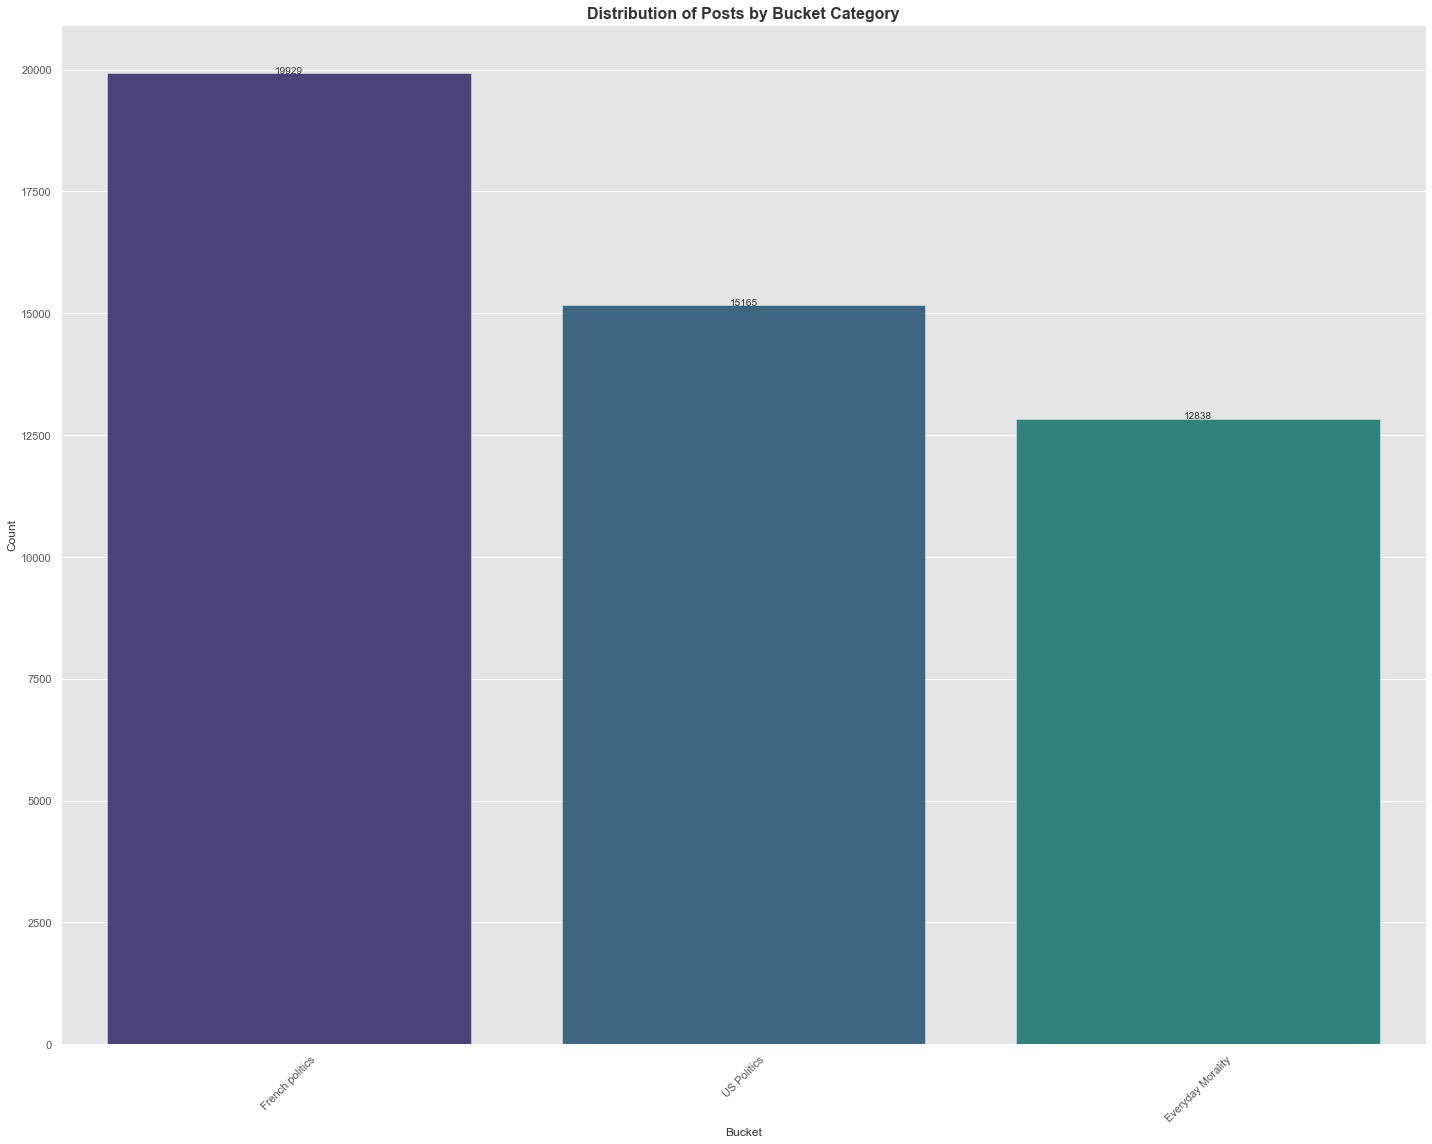

In [63]:
plt.figure(figsize=fig_size)
bucket_counts = sorted_df['bucket'].value_counts()
ax = sns.barplot(x=bucket_counts.index, y=bucket_counts.values, palette=colors)
plt.title('Distribution of Posts by Bucket Category', fontdict=title_font)
plt.xlabel('Bucket', fontdict=label_font)
plt.ylabel('Count', fontdict=label_font)
plt.xticks(rotation=45)
for i, count in enumerate(bucket_counts.values):
    ax.text(i, count + 5, str(count), ha='center', color=text_color)
plt.tight_layout()
plt.show()


<Figure size 1440x1152 with 0 Axes>

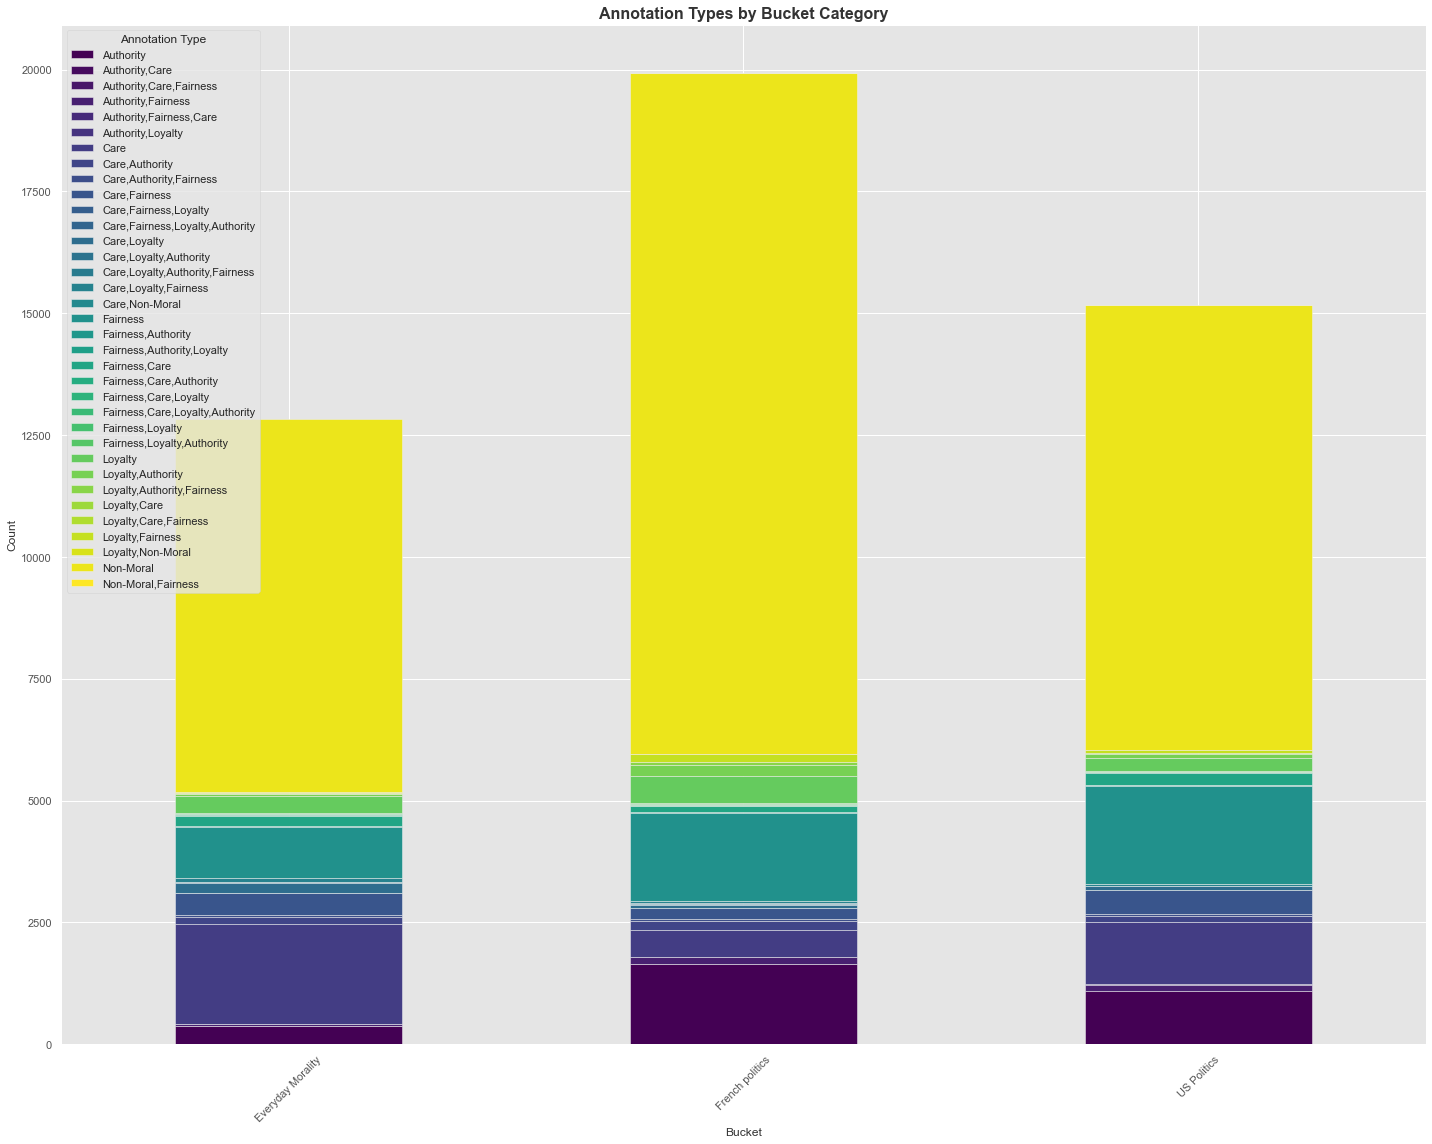

In [64]:
# 4. Stacked bar chart of annotations by bucket
plt.figure(figsize=fig_size)
annotation_by_bucket = pd.crosstab(sorted_df['bucket'], sorted_df['annotation'])
annotation_by_bucket.plot(kind='bar', stacked=True, colormap='viridis', figsize=fig_size)
plt.title('Annotation Types by Bucket Category', fontdict=title_font)
plt.xlabel('Bucket', fontdict=label_font)
plt.ylabel('Count', fontdict=label_font)
plt.legend(title='Annotation Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

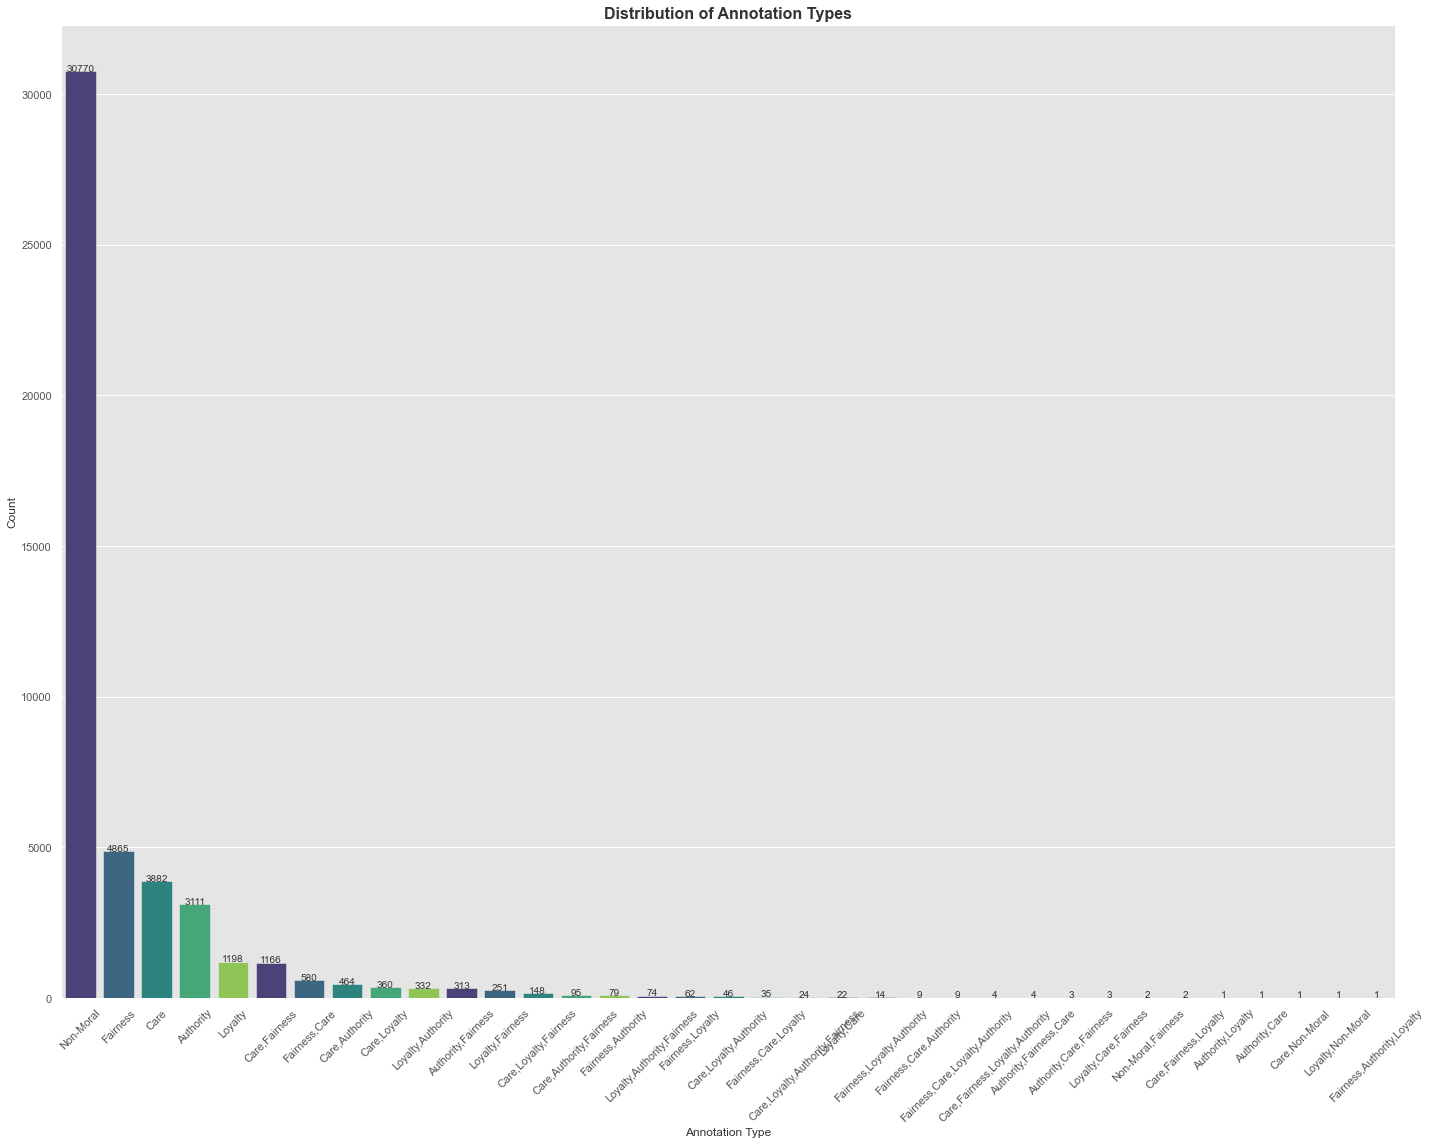

In [66]:
plt.figure(figsize=fig_size)
annotation_counts = sorted_df['annotation'].value_counts().sort_values(ascending=False)
ax = sns.barplot(x=annotation_counts.index, y=annotation_counts.values, palette=colors)
plt.title('Distribution of Annotation Types', fontdict=title_font)
plt.xlabel('Annotation Type', fontdict=label_font)
plt.ylabel('Count', fontdict=label_font)
plt.xticks(rotation=45)

# Add count labels on top of bars
for i, count in enumerate(annotation_counts.values):
    ax.text(i, count + 5, str(count), ha='center', color=text_color)
    
plt.tight_layout()
plt.show()

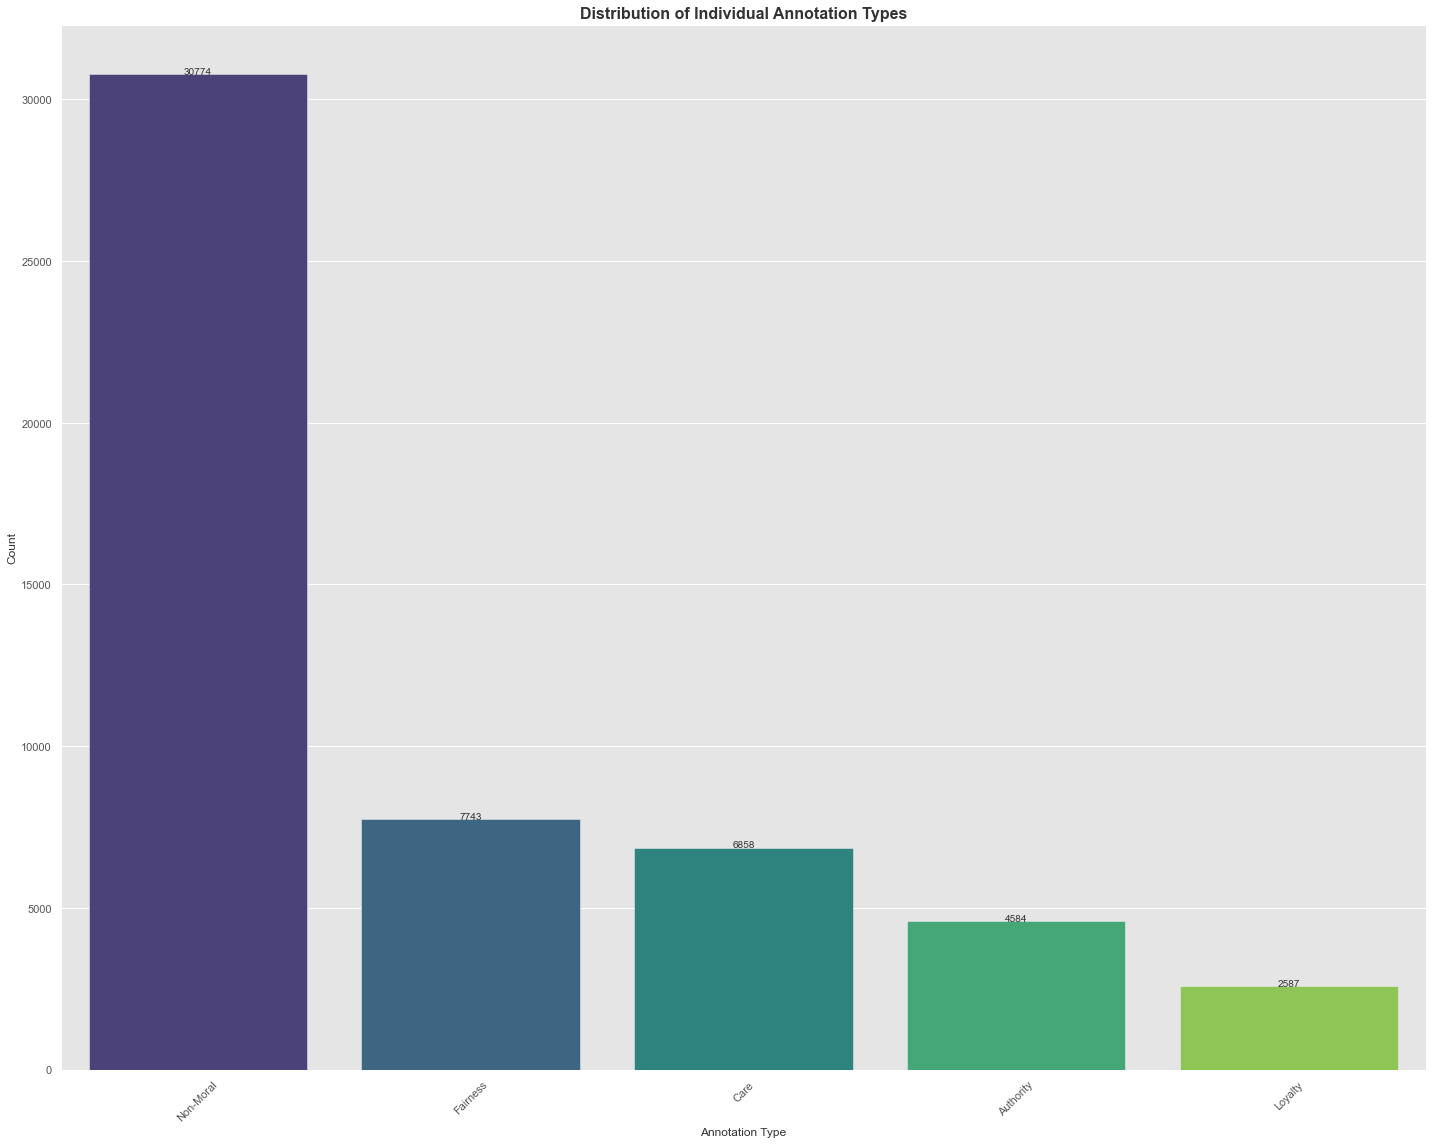

In [68]:
# Function to extract individual annotations from compound ones
def extract_individual_annotations(annotation_series):
    # Split compound annotations and create a flat list of all individual annotations
    all_annotations = []
    for annotation in annotation_series:
        if isinstance(annotation, str):
            individual_annotations = annotation.split(',')
            all_annotations.extend(individual_annotations)
    
    # Count occurrences of each individual annotation
    annotation_counts = pd.Series(all_annotations).value_counts()
    return annotation_counts

individual_annotation_counts = extract_individual_annotations(sorted_df['annotation'])

plt.figure(figsize=fig_size)
ax = sns.barplot(x=individual_annotation_counts.index, 
                y=individual_annotation_counts.values, 
                palette=colors)
plt.title('Distribution of Individual Annotation Types', fontdict=title_font)
plt.xlabel('Annotation Type', fontdict=label_font)
plt.ylabel('Count', fontdict=label_font)
plt.xticks(rotation=45)

for i, count in enumerate(individual_annotation_counts.values):
    ax.text(i, count + 5, str(count), ha='center', color=text_color)
    
plt.tight_layout()
plt.show()


--- EDA for 'MFRC (Twitter)' ---

Top raw annotation strings:
Non-Moral            30770
Fairness              4865
Care                  3882
Authority             3111
Loyalty               1198
Care,Fairness         1166
Fairness,Care          580
Care,Authority         464
Care,Loyalty           360
Loyalty,Authority      332
Name: annotation, dtype: int64

Top individual annotation labels:
Non-Moral: 30774
Fairness: 7743
Care: 6858
Authority: 4584
Loyalty: 2587


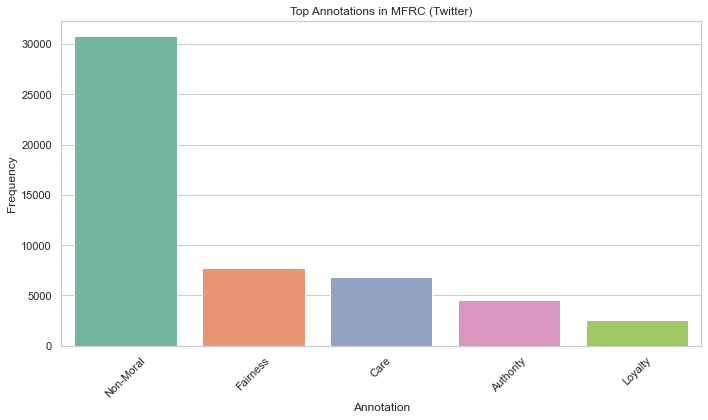


--- EDA for 'MFTC (Reddit)' ---

Top raw annotation strings:
Non-moral             54851
Loyalty                6273
Fairness               6235
Care                   5576
Authority              4766
Care,Fairness          1178
Care,Loyalty            738
Fairness,Authority      400
Loyalty,Authority       328
Fairness,Loyalty        325
Name: annotation, dtype: int64

Top individual annotation labels:
Non-moral: 54865
Fairness: 8645
Care: 8416
Loyalty: 8254
Authority: 6409


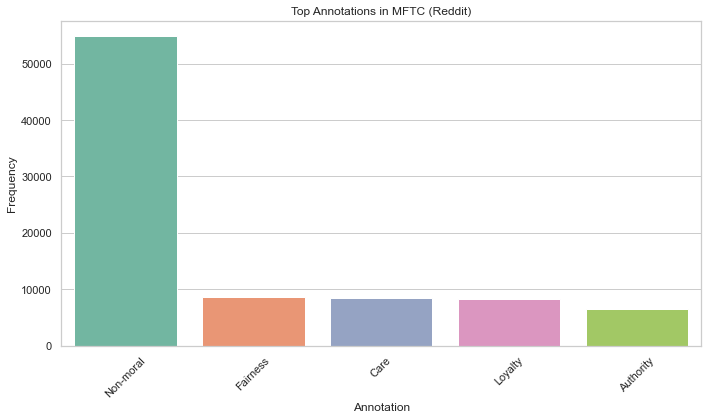

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from itertools import chain

# Load datasets
df1 = pd.read_csv('filtered_moral_annotations_MFRC.csv')  # Twitter (MFRC)
df2 = pd.read_csv('filtered_moral_annotations_MFTC.csv')  # Reddit (MFTC)

def analyze_annotations(df, dataset_name):
    print(f"\n--- EDA for '{dataset_name}' ---")

    # Raw counts
    raw_counts = df['annotation'].value_counts()
    print("\nTop raw annotation strings:")
    print(raw_counts.head(10))

    # Process multi-label annotations
    split_annotations = df['annotation'].dropna().apply(lambda x: [i.strip() for i in x.split(',')])
    flat_annotations = list(chain.from_iterable(split_annotations))
    annotation_counter = Counter(flat_annotations)

    # Most common labels
    most_common = annotation_counter.most_common(10)
    print("\nTop individual annotation labels:")
    for label, count in most_common:
        print(f"{label}: {count}")

    # Bar plot with seaborn
    labels, values = zip(*most_common)
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(labels), y=list(values), palette="Set2")
    plt.title(f'Top Annotations in {dataset_name}')
    plt.xlabel('Annotation')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Run EDA
analyze_annotations(df1, "MFRC (Twitter)")
analyze_annotations(df2, "MFTC (Reddit)")